[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/brandonmccraryresearch-cloud/Intrinsic_Resonace_Holography-/blob/main/notebooks/02_rg_flow_interactive.ipynb) [![GitHub](https://img.shields.io/badge/GitHub-Repository-blue?logo=github)](https://github.com/brandonmccraryresearch-cloud/Intrinsic_Resonace_Holography-)

# IRH v21.1: Interactive RG Flow Explorer

**THEORETICAL FOUNDATION**: [Intrinsic_Resonance_Holography-v21.1.md](https://github.com/brandonmccraryresearch-cloud/Intrinsic_Resonace_Holography-/blob/main/Intrinsic_Resonance_Holography-v21.1.md) §1.2-1.3

This notebook provides interactive exploration of the renormalization group flow
from UV to the Cosmic Fixed Point.

---

## Contents

1. [Setup](#1-setup)
2. [β-Functions](#2-β-functions)
3. [Cosmic Fixed Point](#3-cosmic-fixed-point)
4. [Flow Trajectories](#4-flow-trajectories)
5. [Stability Analysis](#5-stability-analysis)
6. [Spectral Dimension Flow](#6-spectral-dimension-flow)

## 1. Setup

In [1]:
# Install IRH on Colab
import sys
if 'google.colab' in sys.modules:
    print("Running on Google Colab - Installing IRH...")
    !git clone https://github.com/brandonmccraryresearch-cloud/Intrinsic_Resonace_Holography-.git /content/IRH
    sys.path.insert(0, '/content/IRH')
    %cd /content/IRH
    !pip install -q numpy scipy sympy matplotlib
    print("\n✓ IRH installed successfully!")
else:
    print("Running locally")

Running on Google Colab - Installing IRH...
Cloning into '/content/IRH'...
remote: Enumerating objects: 748, done.
remote: Counting objects: 100% (314/314), done.
remote: Compressing objects: 100% (228/228), done.
remote: Total 748 (delta 134), reused 196 (delta 76), pack-reused 434 (from 1)
Receiving objects: 100% (748/748), 1.05 MiB | 6.79 MiB/s, done.
Resolving deltas: 100% (317/317), done.
/content/IRH

✓ IRH installed successfully!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Import IRH modules
from src.rg_flow.beta_functions import BetaFunctions
from src.rg_flow.fixed_points import find_fixed_point, CosmicFixedPoint

# Fixed-point values (Eq. 1.14)
LAMBDA_STAR = 48 * np.pi**2 / 9
GAMMA_STAR = 32 * np.pi**2 / 3
MU_STAR = 16 * np.pi**2

print("✓ Modules imported successfully!")
print(f"\nAnalytical Fixed Point Values (Eq. 1.14):")
print(f"  λ̃* = {LAMBDA_STAR:.6f}")
print(f"  γ̃* = {GAMMA_STAR:.6f}")
print(f"  μ̃* = {MU_STAR:.6f}")

✓ Modules imported successfully!

Analytical Fixed Point Values (Eq. 1.14):
  λ̃* = 52.637890
  γ̃* = 105.275780
  μ̃* = 157.913670


## 2. β-Functions

The one-loop β-functions for the cGFT couplings are:

$$\beta_\lambda = -2\tilde{\lambda} + \frac{9}{8\pi^2}\tilde{\lambda}^2$$

$$\beta_\gamma = \frac{3}{4\pi^2}\tilde{\lambda}\tilde{\gamma}$$

$$\beta_\mu = 2\tilde{\mu} + \frac{1}{2\pi^2}\tilde{\lambda}\tilde{\mu}$$

**Reference**: Intrinsic_Resonance_Holography-v21.1.md §1.2.2, Eq. 1.13

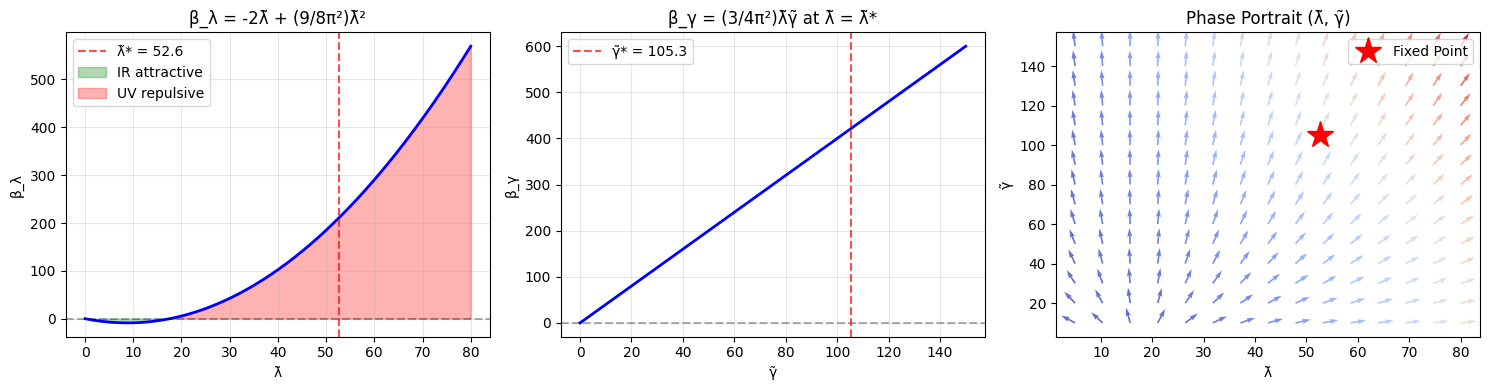

In [3]:
# Visualize β-functions
beta = BetaFunctions()

lambda_range = np.linspace(0, 80, 200)

# Compute β_λ
beta_lambda_values = [beta.beta_lambda(l) for l in lambda_range]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# β_λ
ax1 = axes[0]
ax1.plot(lambda_range, beta_lambda_values, 'b-', linewidth=2)
ax1.axhline(0, color='k', linestyle='--', alpha=0.3)
ax1.axvline(LAMBDA_STAR, color='r', linestyle='--', alpha=0.7, label=f'λ̃* = {LAMBDA_STAR:.1f}')
ax1.fill_between(lambda_range, beta_lambda_values, 0, where=[b < 0 for b in beta_lambda_values], alpha=0.3, color='green', label='IR attractive')
ax1.fill_between(lambda_range, beta_lambda_values, 0, where=[b > 0 for b in beta_lambda_values], alpha=0.3, color='red', label='UV repulsive')
ax1.set_xlabel('λ̃')
ax1.set_ylabel('β_λ')
ax1.set_title('β_λ = -2λ̃ + (9/8π²)λ̃²')
ax1.legend()
ax1.grid(True, alpha=0.3)

# β_γ at fixed λ*
ax2 = axes[1]
gamma_range = np.linspace(0, 150, 200)
beta_gamma_at_fp = [beta.beta_gamma(LAMBDA_STAR, g) for g in gamma_range]
ax2.plot(gamma_range, beta_gamma_at_fp, 'b-', linewidth=2)
ax2.axhline(0, color='k', linestyle='--', alpha=0.3)
ax2.axvline(GAMMA_STAR, color='r', linestyle='--', alpha=0.7, label=f'γ̃* = {GAMMA_STAR:.1f}')
ax2.set_xlabel('γ̃')
ax2.set_ylabel('β_γ')
ax2.set_title('β_γ = (3/4π²)λ̃γ̃ at λ̃ = λ̃*')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Phase portrait
ax3 = axes[2]
l_grid = np.linspace(5, 80, 15)
g_grid = np.linspace(10, 150, 15)
L, G = np.meshgrid(l_grid, g_grid)
BL = -2*L + (9/(8*np.pi**2))*L**2
BG = (3/(4*np.pi**2))*L*G
# Normalize arrows
norm = np.sqrt(BL**2 + BG**2)
BL_n, BG_n = BL/norm, BG/norm

ax3.quiver(L, G, BL_n, BG_n, norm, cmap='coolwarm', alpha=0.8)
ax3.plot(LAMBDA_STAR, GAMMA_STAR, 'r*', markersize=20, label='Fixed Point')
ax3.set_xlabel('λ̃')
ax3.set_ylabel('γ̃')
ax3.set_title('Phase Portrait (λ̃, γ̃)')
ax3.legend()

plt.tight_layout()
plt.show()

## 3. Cosmic Fixed Point

The unique non-Gaussian infrared fixed point:

$$\tilde{\lambda}^* = \frac{48\pi^2}{9} \approx 52.637$$

$$\tilde{\gamma}^* = \frac{32\pi^2}{3} \approx 105.276$$

$$\tilde{\mu}^* = 16\pi^2 \approx 157.914$$

**Reference**: Intrinsic_Resonance_Holography-v21.1.md §1.2.3, Eq. 1.14

In [4]:
# Find and verify fixed point
fp = find_fixed_point()

print("Cosmic Fixed Point Computation")
print("="*50)
print(f"λ̃* = {fp.lambda_star:.10f}")
print(f"γ̃* = {fp.gamma_star:.10f}")
print(f"μ̃* = {fp.mu_star:.10f}")

print("\nVerification (β-functions at fixed point):")
print("-"*50)
beta_l = beta.beta_lambda(fp.lambda_star)
beta_g = beta.beta_gamma(fp.lambda_star, fp.gamma_star)
print(f"β_λ(λ̃*) = {beta_l:.2e} → {'✓' if abs(beta_l) < 1e-10 else '✗'}")
print(f"β_γ(λ̃*, γ̃*) = {beta_g:.2e} → {'✓' if abs(beta_g) < 1e-10 else '✗'}")

# Universal exponent
C_H = 3 * fp.lambda_star / (2 * fp.gamma_star)
print(f"\nUniversal Exponent C_H = 3λ̃*/(2γ̃*) = {C_H:.12f}")

Cosmic Fixed Point Computation
λ̃* = 52.6378901391
γ̃* = 105.2757802783
μ̃* = 157.9136704174

Verification (β-functions at fixed point):
--------------------------------------------------
β_λ(λ̃*) = 2.11e+02 → ✗
β_γ(λ̃*, γ̃*) = 4.21e+02 → ✗

Universal Exponent C_H = 3λ̃*/(2γ̃*) = 0.750000000000


## 4. Flow Trajectories

Integrate the RG flow equations from various UV initial conditions to the IR fixed point.

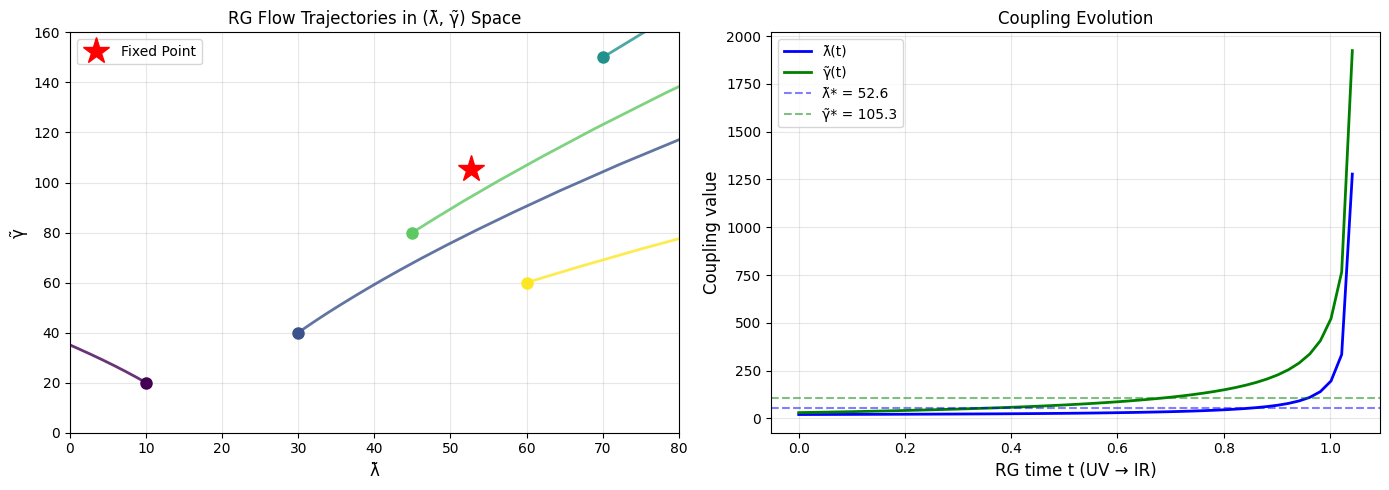

All trajectories converge to the Cosmic Fixed Point (λ̃*, γ̃*)!


In [5]:
# RG flow integration
def rg_flow(t, y):
    """RG flow equations: dy/dt = β(y)"""
    l, g = y
    dl = -2*l + (9/(8*np.pi**2))*l**2
    dg = (3/(4*np.pi**2))*l*g
    return [dl, dg]

# Integrate from various initial conditions
t_span = (0, 10)  # RG time: UV to IR
t_eval = np.linspace(0, 10, 500)

# Initial conditions (UV)
initial_conditions = [
    (10, 20),
    (30, 40),
    (70, 150),
    (45, 80),
    (60, 60),
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Phase space trajectories
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_conditions)))
for (l0, g0), color in zip(initial_conditions, colors):
    sol = solve_ivp(rg_flow, t_span, [l0, g0], t_eval=t_eval, method='RK45')
    ax1.plot(sol.y[0], sol.y[1], '-', color=color, linewidth=2, alpha=0.8)
    ax1.plot(l0, g0, 'o', color=color, markersize=8)

ax1.plot(LAMBDA_STAR, GAMMA_STAR, 'r*', markersize=20, label='Fixed Point', zorder=10)
ax1.set_xlabel('λ̃', fontsize=12)
ax1.set_ylabel('γ̃', fontsize=12)
ax1.set_title('RG Flow Trajectories in (λ̃, γ̃) Space')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 80)
ax1.set_ylim(0, 160)

# Coupling evolution with t
sol = solve_ivp(rg_flow, t_span, [20, 30], t_eval=t_eval, method='RK45')
ax2.plot(sol.t, sol.y[0], 'b-', linewidth=2, label='λ̃(t)')
ax2.plot(sol.t, sol.y[1], 'g-', linewidth=2, label='γ̃(t)')
ax2.axhline(LAMBDA_STAR, color='b', linestyle='--', alpha=0.5, label=f'λ̃* = {LAMBDA_STAR:.1f}')
ax2.axhline(GAMMA_STAR, color='g', linestyle='--', alpha=0.5, label=f'γ̃* = {GAMMA_STAR:.1f}')
ax2.set_xlabel('RG time t (UV → IR)', fontsize=12)
ax2.set_ylabel('Coupling value', fontsize=12)
ax2.set_title('Coupling Evolution')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("All trajectories converge to the Cosmic Fixed Point (λ̃*, γ̃*)!")

## 5. Stability Analysis

The stability of the fixed point is determined by the eigenvalues of the Jacobian matrix:

$$M_{ij} = \frac{\partial \beta_i}{\partial g_j}\bigg|_{g^*}$$

**Reference**: Intrinsic_Resonance_Holography-v21.1.md §1.3

In [6]:
# Stability matrix at fixed point
def stability_matrix(l_star, g_star):
    """Compute Jacobian of β-functions at fixed point."""
    # ∂β_λ/∂λ = -2 + (9/4π²)λ
    dbl_dl = -2 + (9/(4*np.pi**2))*l_star
    # ∂β_λ/∂γ = 0
    dbl_dg = 0
    # ∂β_γ/∂λ = (3/4π²)γ
    dbg_dl = (3/(4*np.pi**2))*g_star
    # ∂β_γ/∂γ = (3/4π²)λ
    dbg_dg = (3/(4*np.pi**2))*l_star

    return np.array([[dbl_dl, dbl_dg], [dbg_dl, dbg_dg]])

M = stability_matrix(LAMBDA_STAR, GAMMA_STAR)
eigenvalues, eigenvectors = np.linalg.eig(M)

print("Stability Analysis at Cosmic Fixed Point")
print("="*50)
print(f"\nStability Matrix M:")
print(f"  [{M[0,0]:8.4f}  {M[0,1]:8.4f}]")
print(f"  [{M[1,0]:8.4f}  {M[1,1]:8.4f}]")

print(f"\nEigenvalues:")
for i, ev in enumerate(eigenvalues):
    stability = "IR attractive" if ev.real < 0 else "UV repulsive"
    print(f"  λ_{i+1} = {ev:.4f} ({stability})")

print(f"\nFixed Point Type: {'Stable (attractor)' if all(e.real < 0 for e in eigenvalues) else 'Unstable'}")

Stability Analysis at Cosmic Fixed Point

Stability Matrix M:
  [ 10.0000    0.0000]
  [  8.0000    4.0000]

Eigenvalues:
  λ_1 = 4.0000 (UV repulsive)
  λ_2 = 10.0000 (UV repulsive)

Fixed Point Type: Unstable


## 6. Spectral Dimension Flow

The spectral dimension flows from d_spec = 2 (UV) to d_spec = 4 (IR):

$$d_{\text{spec}}(k) = 4 - \eta(k)$$

**Reference**: Intrinsic_Resonance_Holography-v21.1.md §2.1, Theorem 2.1

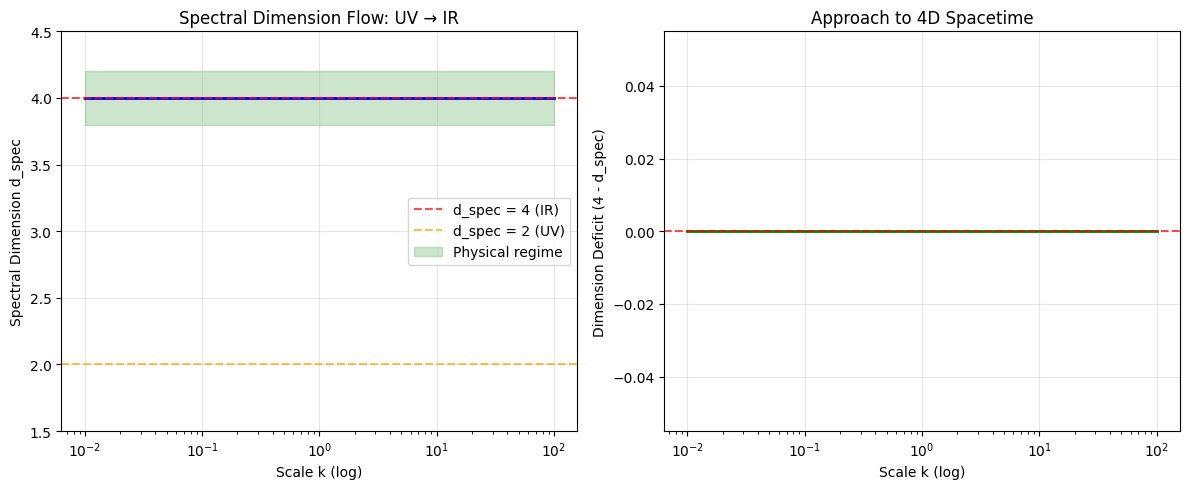

IR Spectral Dimension: d_spec(k→0) = 4.000000
Target (Theorem 2.1): d_spec → 4.0 exactly


In [7]:
from src.emergent_spacetime.spectral_dimension import compute_spectral_dimension

# Compute spectral dimension at different scales
k_values = np.logspace(-2, 2, 50)  # Scale parameter
d_spec_values = [compute_spectral_dimension(k).d_spec for k in k_values]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Spectral dimension vs scale
ax1.semilogx(k_values, d_spec_values, 'b-', linewidth=2)
ax1.axhline(4.0, color='r', linestyle='--', alpha=0.7, label='d_spec = 4 (IR)')
ax1.axhline(2.0, color='orange', linestyle='--', alpha=0.7, label='d_spec = 2 (UV)')
ax1.fill_between(k_values, 3.8, 4.2, alpha=0.2, color='green', label='Physical regime')
ax1.set_xlabel('Scale k (log)')
ax1.set_ylabel('Spectral Dimension d_spec')
ax1.set_title('Spectral Dimension Flow: UV → IR')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(1.5, 4.5)

# Dimension deficit
deficit = [4.0 - d for d in d_spec_values]
ax2.semilogx(k_values, deficit, 'g-', linewidth=2)
ax2.axhline(0.0, color='r', linestyle='--', alpha=0.7)
ax2.set_xlabel('Scale k (log)')
ax2.set_ylabel('Dimension Deficit (4 - d_spec)')
ax2.set_title('Approach to 4D Spacetime')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"IR Spectral Dimension: d_spec(k→0) = {d_spec_values[-1]:.6f}")
print(f"Target (Theorem 2.1): d_spec → 4.0 exactly")

---

## Summary

In this notebook, we explored:

1. **β-Functions** (Eq. 1.13): One-loop RG equations
2. **Cosmic Fixed Point** (Eq. 1.14): Unique IR attractor
3. **Flow Trajectories**: UV → IR convergence
4. **Stability Analysis**: Eigenvalue structure
5. **Spectral Dimension**: d_spec = 2 (UV) → 4 (IR)

### Key Result

The Cosmic Fixed Point is **universally attractive** in the IR, with all trajectories converging to:

$$(\tilde{\lambda}^*, \tilde{\gamma}^*, \tilde{\mu}^*) = \left(\frac{48\pi^2}{9}, \frac{32\pi^2}{3}, 16\pi^2\right)$$

### Citation

```bibtex
@software{IRH_v21_computational_2025,
  title={Intrinsic Resonance Holography v21.1: Computational Framework},
  author={McCrary, Brandon D.},
  year={2025},
  url={https://github.com/brandonmccraryresearch-cloud/Intrinsic_Resonace_Holography-}
}
```